## 用電量偵測分析  AIGO x 廣宣科技
### 教材Github連結 https://github.com/paulbroadmission/enegy_prediction

# 第一部分 資料取得以及數據前處理

## 讀入資料

In [1]:
import pandas as pd

df = pd.read_csv("power.csv")
df.head()

,Datetime,Load
0,1998-12-31 1:00:00,29309.0
1,1998-12-31 2:00:00,28236.0
2,1998-12-31 3:00:00,27692.0
3,1998-12-31 4:00:00,27596.0
4,1998-12-31 5:00:00,27888.0


In [2]:
df.tail()

,Datetime,Load
178257,2018-01-01 20:00:00,NaN
178258,2018-01-01 21:00:00,NaN
178259,2018-01-01 22:00:00,NaN
178260,2018-01-01 23:00:00,NaN
178261,2018-01-02 0:00:00,NaN


## 資料的狀態

In [3]:
df.shape

(178262, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   Load      32896 non-null   float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


In [5]:
df.describe()

,Load
count,32896.000000
mean,29766.427408
std,5849.769954
min,17461.000000
25%,25473.000000
50%,29655.000000
75%,33073.250000
max,54030.000000


## 查看是否有空值

In [6]:
print(df.isnull().values.any())

True


In [7]:
print(df.isnull().sum())

Datetime         0
Load        145366
dtype: int64


In [8]:
print(df.isnull().sum().sum())

145366


In [9]:
print(df[df.isnull().T.any()])

                   Datetime  Load
32896    2002-12-31 1:00:00   NaN
32897    2002-12-31 2:00:00   NaN
32898    2002-12-31 3:00:00   NaN
32899    2002-12-31 4:00:00   NaN
32900    2002-12-31 5:00:00   NaN
...                     ...   ...
178257  2018-01-01 20:00:00   NaN
178258  2018-01-01 21:00:00   NaN
178259  2018-01-01 22:00:00   NaN
178260  2018-01-01 23:00:00   NaN
178261   2018-01-02 0:00:00   NaN

[145366 rows x 2 columns]


In [10]:
df.dropna(inplace=True) 

## 調整 index 

In [11]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format="%Y-%m-%d %H:%M:%S") #增加一個Datetime 的欄位
df.head()

,Datetime,Load
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


In [12]:
df = df.set_index('Datetime')
df.head()

,Load
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0


## 切 training 與 testing set

In [13]:
df.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2001-01-01 15:00:00', '2001-01-01 16:00:00',
               '2001-01-01 17:00:00', '2001-01-01 18:00:00',
               '2001-01-01 19:00:00', '2001-01-01 20:00:00',
               '2001-01-01 21:00:00', '2001-01-01 22:00:00',
               '2001-01-01 23:00:00', '2001-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=32896, freq=None)

In [14]:
split_date = '2001-01-01 00:00:00'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [15]:
df_train.tail()

,Load
Datetime,
2000-01-01 20:00:00,29331.0
2000-01-01 21:00:00,28912.0
2000-01-01 22:00:00,28139.0
2000-01-01 23:00:00,26905.0
2000-01-02 00:00:00,25043.0


In [16]:
df_test.head()

,Load
Datetime,
2001-12-31 01:00:00,29001.0
2001-12-31 02:00:00,28138.0
2001-12-31 03:00:00,27830.0
2001-12-31 04:00:00,27874.0
2001-12-31 05:00:00,28427.0


In [17]:
df_test.shape

(8758, 1)

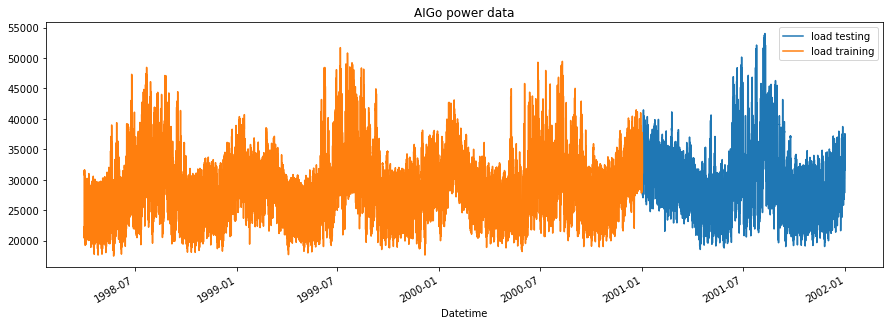

In [18]:
df_test.rename(columns={'Load': 'load testing'})\
  .join(df_train.rename(columns={'Load': 'load training'}), how='outer')\
  .plot(figsize=(15,5), title='AIGo power data', style='-')

In [19]:
def generate_date_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

## 分離 X (feature vector), y (target vector)

In [20]:
X_train_ml, y_train_ml = generate_date_features(df_train, label='Load')

In [21]:
X_train_ml.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,
1998-12-31 01:00:00,1,3,4,12,1998,365,31,53
1998-12-31 02:00:00,2,3,4,12,1998,365,31,53
1998-12-31 03:00:00,3,3,4,12,1998,365,31,53
1998-12-31 04:00:00,4,3,4,12,1998,365,31,53
1998-12-31 05:00:00,5,3,4,12,1998,365,31,53


In [22]:
y_train_ml.head()

Datetime
1998-12-31 01:00:00    29309.0
1998-12-31 02:00:00    28236.0
1998-12-31 03:00:00    27692.0
1998-12-31 04:00:00    27596.0
1998-12-31 05:00:00    27888.0
Name: Load, dtype: float64

In [23]:
X_test_ml, y_test_ml = generate_date_features(df_test, label='Load')

# 模型訓練與預測

## XGBoost

In [24]:
!pip install xgboost

  Using cached xgboost-1.1.0-py3-none-manylinux2010_x86_64.whl (127.6 MB)


In [25]:
import xgboost
reg = xgboost.XGBRegressor(n_estimators=1000)
reg.fit(X_train_ml, y_train_ml,
        eval_set=[(X_train_ml, y_train_ml), (X_test_ml, y_test_ml)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

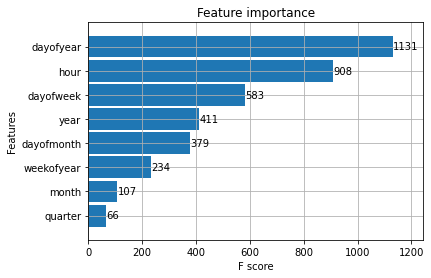

In [26]:
# no use in this case
from xgboost import plot_importance, plot_tree
_ = plot_importance(reg, height=0.9)

In [27]:
df_test['XGBoost Prediction'] = reg.predict(X_test_ml)
prediction_result = pd.concat([df_test, df_train], sort=False)

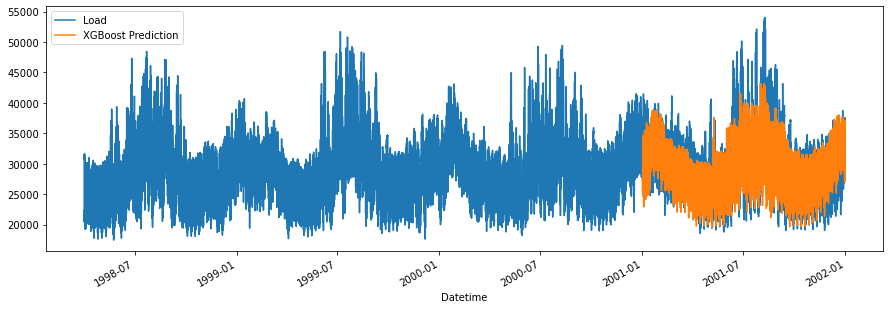

In [28]:
prediction_result[['Load','XGBoost Prediction']].plot(figsize=(15, 5))

## LSTM

In [29]:
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [30]:
df.shape

(32896, 1)

In [31]:
df.head()

,Load
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0


In [32]:
import numpy as np
def load_data(data, seq_len, split_date = '2001-01-01 00:00:00'):
    df_train = df.loc[data.index <= split_date].copy()
    df_test = df.loc[data.index > split_date].copy()
    print("df_train=%d, df_test=%d", len(df_train), len(df_test))

    X_train= []
    y_train= []
    X_test= []
    y_test= []

    # 序列化 
    # training set
    print("serializing training set")
    for i in range(seq_len, len(df_train)):
        X_train.append(df_train.iloc[i-seq_len : i, 0])
        y_train.append(df_train.iloc[i, 0])
    
    # testing set
    print("serializing testing set")
    for i in range(seq_len, len(df_test)):
        X_test.append(df_test.iloc[i-seq_len : i, 0])
        y_test.append(df_test.iloc[i, 0])
    
    #1 last 6189 days are going to be used in test
    '''
    X_test = X_full[110000:]             
    y_test = y_train[110000:]
    
    #2 first 110000 days are going to be used in training
    X_train = X_train[:110000]           
    y_train = y_train[:110000]
    '''
    #3 convert to numpy array
    print("converting training set")
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    print("converting training set")
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    print("reshaping training set")
    X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
    
    print("reshaping testing set")
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [33]:
import sklearn

def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['Load']=scaler.fit_transform(df['Load'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(32896, 1)

In [34]:
#create train, test data
import numpy as np
seq_len = 18 #choose sequence length

X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = load_data(df_norm, seq_len)

print('X_train.shape = ',X_train_lstm.shape)
print('y_train.shape = ', y_train_lstm.shape)
print('X_test.shape = ', X_test_lstm.shape)
print('y_test.shape = ',y_test_lstm.shape)

df_train=%d, df_test=%d 24138 8758
serializing training set
serializing testing set
converting training set
converting training set
reshaping training set
reshaping testing set
X_train.shape =  (24120, 18, 1)
y_train.shape =  (24120,)
X_test.shape =  (8740, 18, 1)
y_test.shape =  (8740,)


In [35]:
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train_lstm.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 18, 40)            6720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 18, 40)            12960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 18, 40)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_______________________

In [36]:
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=1000)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





24120/24120 [==============================] - 9s 361us/step - loss: 0.0467
Epoch 2/10
24120/24120 [==============================] - 5s 225us/step - loss: 0.0231
Epoch 3/10
24120/24120 [==============================] - 5s 226us/step - loss: 0.0216
Epoch 4/10
24120/24120 [==============================] - 5s 222us/step - loss: 0.0200
Epoch 5/10
24120/24120 [==============================] - 5s 223us/step - loss: 0.0179
Epoch 6/10
24120/24120 [==============================] - 5s 223us/step - loss: 0.0149
Epoch 7/10
24120/24120 [==============================] - 5s 225us/step - loss: 0.0114
Epoch 8/10
24120/24120 [==============================] - 5s 224us/step - loss: 0.0089
Epoch 9/10
24120/24120 [==============================] - 5s 222us/step - loss: 0.0079
Epoch 10/10
24120/24120 [==============================] - 5s 224us/step - loss: 0.0070


In [37]:
lstm_predictions = lstm_model.predict(X_test_lstm)

In [38]:
import matplotlib.pyplot as plt

def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

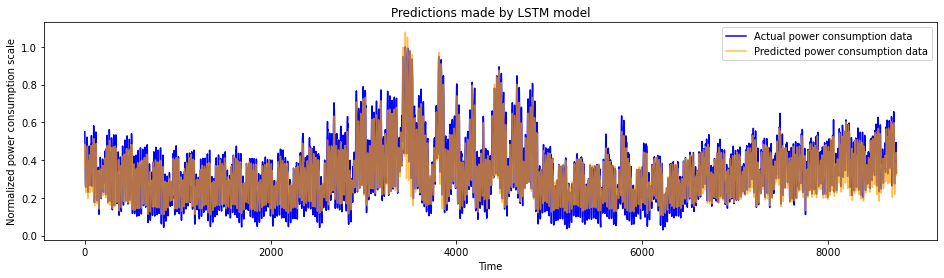

In [39]:
plot_predictions(y_test_lstm, lstm_predictions, "Predictions made by LSTM model")